# Многопараметрическая адаптация системы управления летательным аппаратом баллистического типа

## Предисловие

Данная работа непосредственно связана со специальностью автора, полученной им в рамках обучения в высшем учебном заведении.

Данная работа выполнена без научного руководства и какого-либо курирования со стороны более компетентных специалистов, чем сам автор. 

Вспомогательное ПО для моделирования полета летательного аппарата также разработано автором данной работы, но **приложено к работе не будет**. 

# Теоретическая часть

## Список использованных сокращений

- БЦВМ - бортовая цифровая вычислительная машина;
- ЛА - летательный аппарат;
- ОТР - оперативно-тактическая ракета;
- СК - система координат;
- СПО - специальное программное обеспечение;
- СН - система наведения;
- СС - система стабилизации;
- СУ - система управления;

## Введение

При синтезе СУ ЛА с целью получения лучших ее характеристик требуется достаточно трудоемкое определение параметров СУ: коэффициентов усиления, демпфирования, постоянных времени и т.д., которые зависят от габаритных, массово-инерционных и, главным образом, аэродинамических характеристик ЛА, непрерывно меняющихся в ходе полета.

В процессе полета вычисление управляющих сигналов по каналам тангажа, рысканья и крена осуществляется с помощью уравнений управления, зависящих от параметров вектора состояния ЛА, а также коэффициентов СН и СС (коэффициентов управления), которые, в свою очередь, связаны с параметрами СУ. Определение коэффициентов СН и СС осуществляется непосредственно в процессе движения, что приводит к значительной нагрузке на БЦВМ ввиду трудоемкости вычислений, требует наличия сложных датчиков и приборов.

Для более быстрого определения коэффициентов управления и снижения вычислительной нагрузки на БЦВМ предложена система зависимостей коэффициентов управления от ряда параметров полета ЛА, синтезированная с помощью методов машинного обучения. С применением предложенной системы проведена оценка области попадания ЛА с адаптивной системой управления и сравнение ее с областью попадания в случае определения коэффициентов управления в зависимости от параметров вектора состояния ЛА.

## Постановка задачи

Для достижения поставленной цели требуется сформировать систему управления летательным аппаратом, на основе уравнений, объединяющих свойства окружающей среды и параметры полета ЛА. Для этого необходимо решить следующие задачи:
1) сформировать математическую модель движения летательного аппарата на этапе самонаведения на цель;

2) реализовать математическую модель движения в виде СПО, позволяющего рассчитывать параметры траектории ЛА;

3) реализовать систему управления ЛА, коэффициенты которой определяются в зависимости от ряда параметров полета ЛА;

4) с помощью СПО произвести необходимые расчеты для определения области попадания ЛА для случая, когда коэффициенты системы управления являются функциями параметров вектора состояния ЛА;

5) с помощью СПО произвести необходимые расчеты для определения области попадания ЛА для случая, когда коэффициенты системы управления являются уравнениями линейной регрессии с аргументами, в виде ряда параметров полета ЛА;

6) оценить полученные результаты.

## Математическая модель движения ЛА

Моделируется пространственное движение летательного аппарата под действием силы притяжения Земли и аэродинамического сопротивления. Математическая модель движения летательного аппарата представляет собой систему дифференциальных уравнений в земной системе координат. 

Подразумеваются следующие допущения:
- гравитационное поле Земли – плоскопараллельное поле;
- ЛА – абсолютно твердое тело;
- масса ЛА не изменяется;
- параметры атмосферы определяются согласно ГОСТ 4401-81.

Дифференциальные уравнения движения ЛА интегрируются методом Эйлера с шагом 0.0001с.

Начальные условия движения ЛА заданы в нормальной земной системе координат. Нормальная земная система координат – земная система координат, ось которой OYg направлена вверх по местной вертикали, а направление осей OXg и OZg выбирается в соответствии с задачей.

Аэродинамические силы, действующие на ЛА, рассчитываются в скоростной системе координат. Скоростная система координат – подвижная система координат, ось OX которой совпадает с направлением скорости ЛА, а ось OY лежит в плоскости симметрии ЛА или в плоскости, параллельной ей, если начало координат O помещено вне плоскости симметрии, и направлена к верхней части ЛА или части, условно ей соответствующей.

Связанная система координат – подвижная система координат, осями которой являются продольная ось OXсв, нормальная ось OYсв и поперечная ось OZсв, фиксированные относительно ЛА.

Подробно заострять внимание на математической модели движения ЛА в рамках данной работы не требуется. Ниже будут даны дифференциальные уравления движения ЛА в общем виде, а также необходимые для понимания задачи в части работы с СН зависимости.

Уравнения поступательного движения ОТР:

\begin{cases} 
  \frac{dV_{xg}}{dt} = \frac{F_{xg}}{m};\\
  \frac{dV_{yg}}{dt} = \frac{F_{yg}}{m} - g;\\
  \frac{dV_{zg}}{dt} = \frac{F_{zg}}{m};\\
  \frac{dX_{g}}{dt} = V_{xg};\\
  \frac{dY_{g}}{dt} = V_{yg};\\
  \frac{dZ_{g}}{dt} = V_{zg};
\end{cases}


\begin{equation}\left(\begin{array}{c} F_{xg} \\ F_{yg} \\ F_{zg}\end{array}\right)
=A_{ст \leftarrow св} 
\left(
\begin{array}{c} 
X \\ Y \\ Z
\end{array}
\right)\end{equation}

где Vxg, Vyg, Vzg - проекции вектора скорости на оси нормальной земной СК;\
Xg, Yg, Zg - проекции радиус-вектора на оси нормальной земной СК;\
m - масса ЛА;\
X, Y, Z - проекции аэродинамической силы на оси связанной СК;\
Fxg, Fyg, Fzg - проекции сил, действующих на ЛА на оси нормальной земной СК;\
Аст<-св - матрица перехода из связанной СК в нормальную земную;\
g = 9.80665 [м/с^2].

Уравнения управления по каналам тангажа, рыскания и крена могут быть записаны следующим образом:

\begin{equation}
\delta_{в} = K_{\dot{\phi}}K_{Кв}K_{1в}\dot{\phi}-K_{2в}\dot{\vartheta}\\
\delta_{н} = K_{\dot{\chi}}K_{Кн}K_{1н}\dot{\chi}-K_{2н}\dot{\psi}\\
\delta_{к} = -K_{1э}\dot{\gamma}-K_{2э}\dot{\gamma}\
\end{equation}

В данной работе нас интересуют коэффициенты управления К1в, К2в, К1н, К2н, К1э, К2э. Их зависимости от вектора состояния летательного аппарата довольно сложны и их вычисление требует производить множества расчетов на каждом шаге интегрирования траектории ЛА. Они зависят от динамических коэффициентов системы управления и производных углов ориентации ЛА. Синтез контура системы управления ЛА это задача, рассмотрение которой в рамках текущей работы не имеет большого смысла. Поэтому, ограничимся рядом упрощений, которые необходимы, чтобы сформулировать задачу для модели машинного обучения.

Упрощение №1: коэффициенты наведения по каналу тангажа и рыскания попарно равны.

Упрощение №2: коэффициенты наведения по каналу крена апроксимируются линейной зависимостью одного аргумента и константой, то есть, применен подход однопараметрической адаптации.

\begin{equation}
K_{1в} = K_{1н}\\
K_{2в} = K_{2н}\\
K_{1э} = -0.00140452 n_{x} + 83.2988\\
K_{2э} = 11900
\end{equation}

где nx - осевая перегрузка летательного аппарата.

## Алгоритм работы и оценка результата

Для данной работы помимо представленного ниже ПО понадобится еще две программы:
- СПО моделирования траекторий полета ОТР на участке самонаведения;
- СПО моделирования зоны попадания ОТР на участке самонаведения.

Первая программа позволяет смоделировать неограниченное количество траекторий полета ЛА, задавшись разными точками прицеливания на поверхности земли. Моделирование траекторий необходимо для создания начальных данных, на которых будет обучена модель. В данной работе таких траекторий с разными координатами цели промоделировано 18 штук.

Вторая программа позволяет узнать, как выглядит область, цели в которой будут поражены ОТР с круговым отклонением не более 5м.

Обе программы написаны на языке С++, исходный код их **не будет** приложен к данной работе.

Алгоритм работы:
1. моделируется n траекторий ЛА с разными точками прицеливания с применением не адаптивной системы наведения;
2. моделируется зона попадания ЛА с применением не адаптивной системы наведения;
3. на основании параметров траекторий, смоделированных в п. 1, формируется датасет параметров траекторий;
4. датасет параметров траекторий очищается от ненужных данных;
5. из датасета параметров траекторий формируется обучающая и тестовая выборки, а также выделяются два целевых признака;
6. обучается две модели линейной регрессии на обучающей выборке датасета параметров траекторий;
7. из обученных моделей выделяются уравнения линейной регрессии для интересующих коэффициентов системы управления;
8. уравления помещаются в СПО моделирования зоны попадания ОТР на участке самонаведения, производится повторное моделирование зоны попадания;
9. реальное время выполнения программы, а также форма и размер зоны сравнивается с соответствующими результатами моделирования без применения многопараметрической адаптации системы управления ЛА.

Оценка результата происходит по реальному времени выполнения программы из-за того, что другого способа оценки эффективности одного метода получения коэффициентов системы наведения просто нет. Доступа к реальной БЦВМ и настоящей программе управления ОТР у автора данной работы нет, а наличие этого доступа сделало бы невозможным выложить данную работу куда либо.

В дальнейшем для моделей линейной регрессии и будет рассчитано среднеквадратическое отклонение предсказанных значений целевых признаков от реальных, это значение не несет за собой большой смысловой нагрузки. Основным критерием качества предложенной методики адаптации системы управления будет форма и размер зоны попадания, а также косвенное свидетельство о меньшей вычислительной сложности алгоритма из факта уменьшения реального времени моделирования полета или группы полетов (зоны попадания).

# Практическая часть

## Импорт библиотек и настройки вывода

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 500)

In [3]:
random_state = 42

## Вспомогательные функции

In [4]:
def rMSE(target, predict):
    rmse = mean_squared_error(target, predict)
    return rmse**0.5

In [5]:
def K1B_appender(df, koefs):
    df['K1_B_new'] = (koefs['Koef'][0] * df['Vx'] +
                      koefs['Koef'][1] * df['Vy'] + 
                      koefs['Koef'][2] * df['Vz'] + 
                      koefs['Koef'][3] * df['Omega_x'] + 
                      koefs['Koef'][4] * df['Omega_y'] + 
                      koefs['Koef'][5] * df['Omega_z'] +
                      koefs['Koef'][6] * df['teta'] +
                      koefs['Koef'][7] * df['psi'] +
                      koefs['Koef'][8] * df['gamma'] +
                      koefs['Koef'][9] * df['alpha'] +
                      koefs['Koef'][10] * df['beta'] +
                      koefs['Koef'][11] * df['q'] +
                      koefs['Koef'][12] * df['|nx|'] +
                      koefs['Koef'][13])
    return df

def K2B_appender(df, koefs):
    df['K2_B_new'] = (koefs['Koef'][0] * df['Vx'] +
                      koefs['Koef'][1] * df['Vy'] + 
                      koefs['Koef'][2] * df['Vz'] + 
                      koefs['Koef'][3] * df['Omega_x'] + 
                      koefs['Koef'][4] * df['Omega_y'] + 
                      koefs['Koef'][5] * df['Omega_z'] +
                      koefs['Koef'][6] * df['teta'] +
                      koefs['Koef'][7] * df['psi'] +
                      koefs['Koef'][8] * df['gamma'] +
                      koefs['Koef'][9] * df['alpha'] +
                      koefs['Koef'][10] * df['beta'] +
                      koefs['Koef'][11] * df['q'] +
                      koefs['Koef'][12] * df['|nx|'] +
                      koefs['Koef'][13])
    return df

## Импорт данных

In [6]:
#Опорные траектории
data_x_3500_z_700 = pd.read_excel('Trajectories/X 3500 Z 700.xlsx', sheet_name = 0)

data_x_4000_z_0 = pd.read_excel('Trajectories/X 4000 Z 0.xlsx', sheet_name = 0)
data_x_4000_z_500 = pd.read_excel('Trajectories/X 4000 Z 500.xlsx', sheet_name = 0)
data_x_4000_z_1000 = pd.read_excel('Trajectories/X 4000 Z 1000.xlsx', sheet_name = 0)

data_x_4500_z_0 = pd.read_excel('Trajectories/X 4500 Z 0.xlsx', sheet_name = 0)
data_x_4500_z_500 = pd.read_excel('Trajectories/X 4500 Z 500.xlsx', sheet_name = 0)
data_x_4500_z_1000 = pd.read_excel('Trajectories/X 4500 Z 1000.xlsx', sheet_name = 0)

data_x_5000_z_0 = pd.read_excel('Trajectories/X 5000 Z 0.xlsx', sheet_name = 0)
data_x_5000_z_700 = pd.read_excel('Trajectories/X 5000 Z 700.xlsx', sheet_name = 0)
data_x_5000_z_1250 = pd.read_excel('Trajectories/X 5000 Z 1250.xlsx', sheet_name = 0)

data_x_5500_z_0 = pd.read_excel('Trajectories/X 5500 Z 0.xlsx', sheet_name = 0)
data_x_5500_z_700 = pd.read_excel('Trajectories/X 5500 Z 700.xlsx', sheet_name = 0)
data_x_5500_z_1250 = pd.read_excel('Trajectories/X 5500 Z 1250.xlsx', sheet_name = 0)

data_x_6000_z_0 = pd.read_excel('Trajectories/X 6000 Z 0.xlsx', sheet_name = 0)
data_x_6000_z_700 = pd.read_excel('Trajectories/X 6000 Z 700.xlsx', sheet_name = 0)
data_x_6000_z_1250 = pd.read_excel('Trajectories/X 6000 Z 1250.xlsx', sheet_name = 0)

data_x_6500_z_0 = pd.read_excel('Trajectories/X 6500 Z 0.xlsx', sheet_name = 0)
data_x_6500_z_500 = pd.read_excel('Trajectories/X 6500 Z 500.xlsx', sheet_name = 0)

#Объединенный датафрейм траекторий
all_dataframes = [data_x_3500_z_700, 
                  data_x_4000_z_0, data_x_4000_z_500, data_x_4000_z_1000,
                  data_x_4500_z_0, data_x_4500_z_500, data_x_4500_z_1000,
                  data_x_5000_z_0, data_x_5000_z_700, data_x_5000_z_1250,
                  data_x_5500_z_0, data_x_5500_z_700, data_x_5500_z_1250,
                  data_x_6000_z_0, data_x_6000_z_700, data_x_6000_z_1250,
                  data_x_6500_z_0, data_x_6500_z_500]
data_full = pd.concat(all_dataframes, ignore_index = True)

#Зона попадания ОТР без применения адаптаций в системе наведения
data_zone_default = pd.read_excel('Zone Reference.xlsx', 
                                  header = None, 
                                  sheet_name = 0).rename(columns = {0 : 'X', 1 : 'Y'})

#Точки попадания опорных траекторий
data_targets = pd.DataFrame(data = 
                            {'X' : [3500, 4000, 4000, 4000, 4500, 4500, 4500, 5000, 5000, 
                                    5000, 5500, 5500, 5500, 6000, 6000, 6000, 6500, 6500], 
                             'Y' : [700, 0, 500, 1000, 0, 500, 1000, 0, 700, 
                                    1250, 0, 700, 1250, 0, 700, 1250, 0, 500]})

## Зона попадания ОТР и точки падения для опорных траекторий

Text(0.5, 1.0, 'Зона попадания ОТР без адаптации системы наведения')

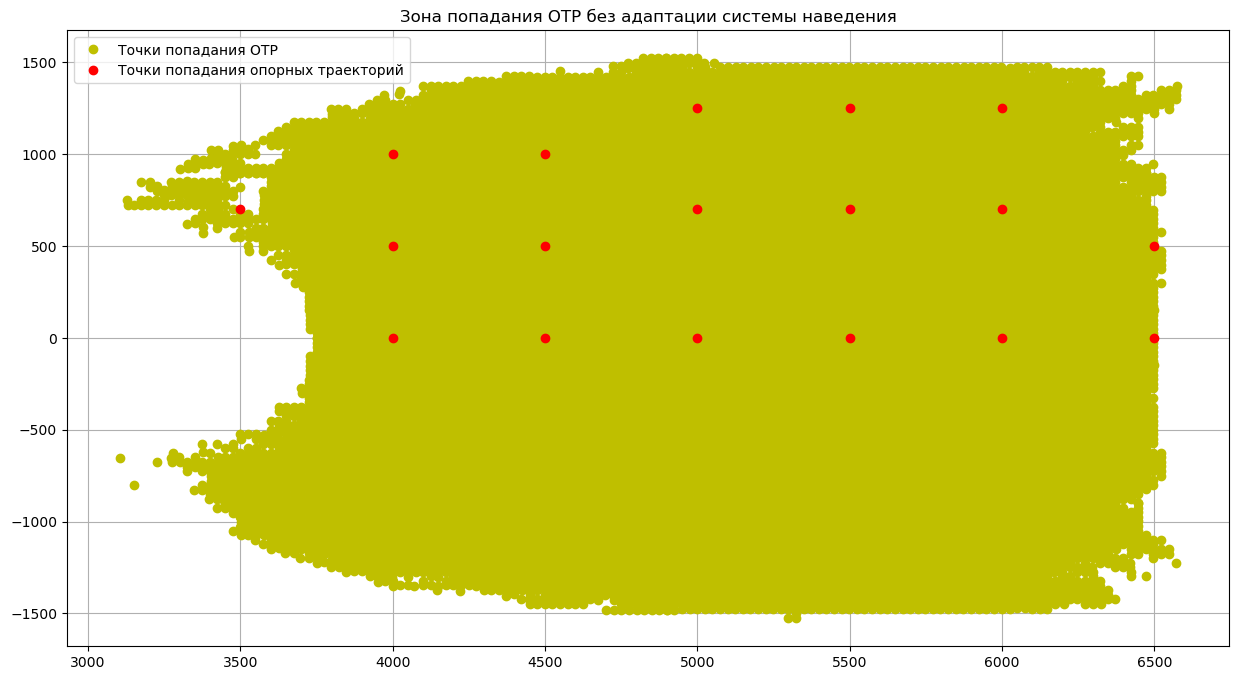

In [7]:
fig = plt.figure(figsize = (15, 8))

ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(data_zone_default['X'], data_zone_default['Y'], 'oy')
ax1.plot(data_targets['X'], data_targets['Y'], 'or')
ax1.grid(visible = True)
ax1.legend(labels = ['Точки попадания ОТР', 'Точки попадания опорных траекторий'], loc = 'best')
ax1.set_title('Зона попадания ОТР без адаптации системы наведения')

## Исследование полного датасета траекторий

### Основная информация о датасете

In [8]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21397 entries, 0 to 21396
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   t        21397 non-null  float64
 1   X        21397 non-null  float64
 2   Y        21397 non-null  float64
 3   Z        21397 non-null  float64
 4   Vx       21397 non-null  float64
 5   Vy       21397 non-null  float64
 6   Vz       21397 non-null  float64
 7   Omega_x  21397 non-null  float64
 8   Omega_y  21397 non-null  float64
 9   Omega_z  21397 non-null  float64
 10  teta     21397 non-null  float64
 11  psi      21397 non-null  float64
 12  gamma    21397 non-null  float64
 13  alpha    21397 non-null  float64
 14  beta     21397 non-null  float64
 15  delta_t  21397 non-null  float64
 16  delta_r  21397 non-null  float64
 17  delta_k  21397 non-null  int64  
 18  q        21397 non-null  float64
 19  K1_B     21397 non-null  float64
 20  K2_B     21397 non-null  float64
 21  K1_H     213

### Корреляционная матрица

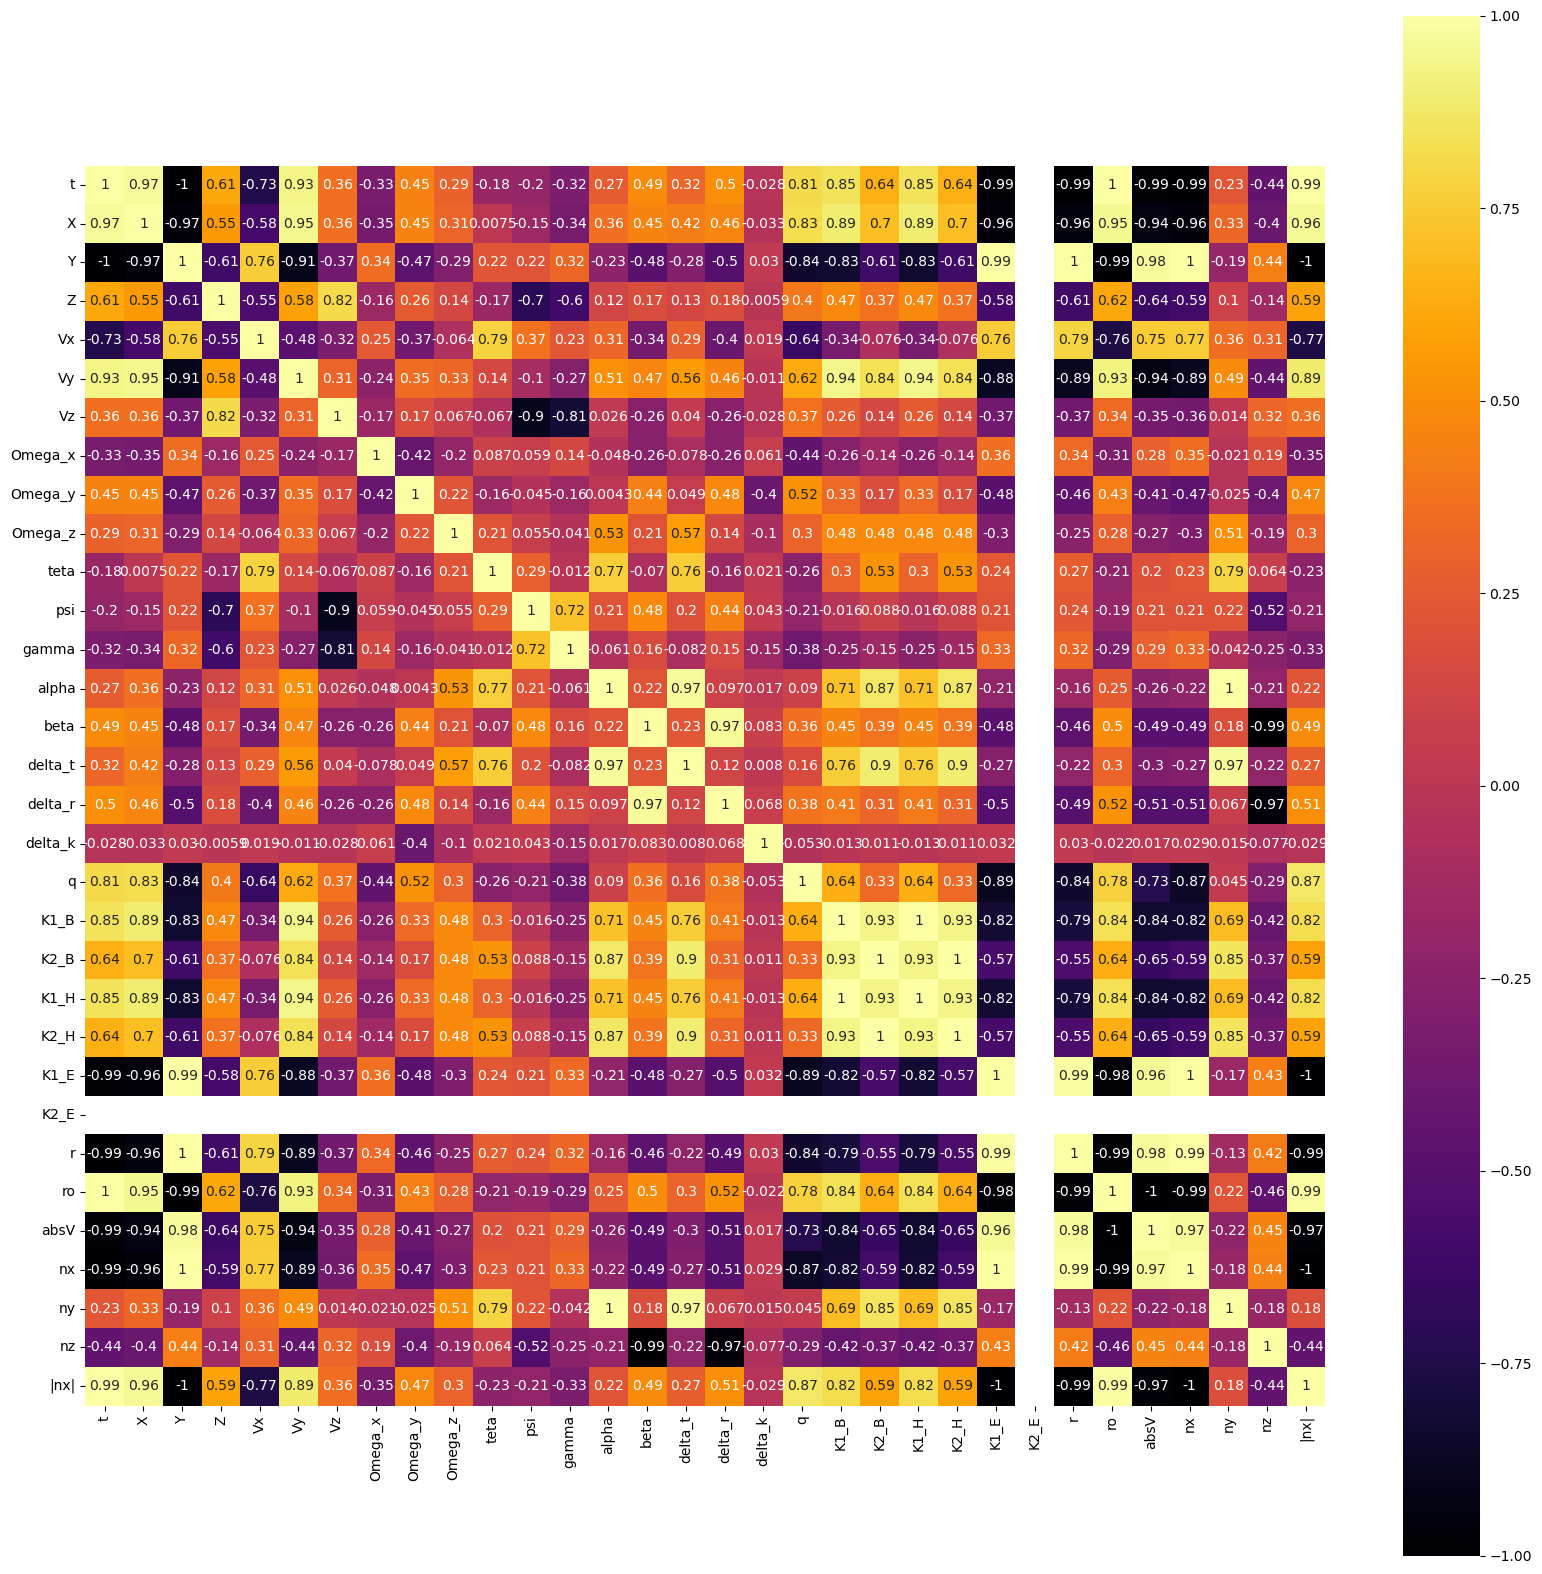

In [9]:
fig = plt.figure(figsize = (20, 20))

ax1 = fig.add_subplot(111)

ax1 = sns.heatmap(data = data_full.corr(), 
                  square = True, 
                  cmap = 'inferno', 
                  annot = True)

### Очистка признаков

In [10]:
drop_cols = ['t', 'X', 'Y', 'Z', 'delta_t', 'delta_r', 'delta_k', 
             'K1_H', 'K2_H', 'K1_E', 'K2_E', 'r', 'ro', 'absV', 'nx', 'ny', 'nz']
data_filtered = data_full.drop(columns = drop_cols)

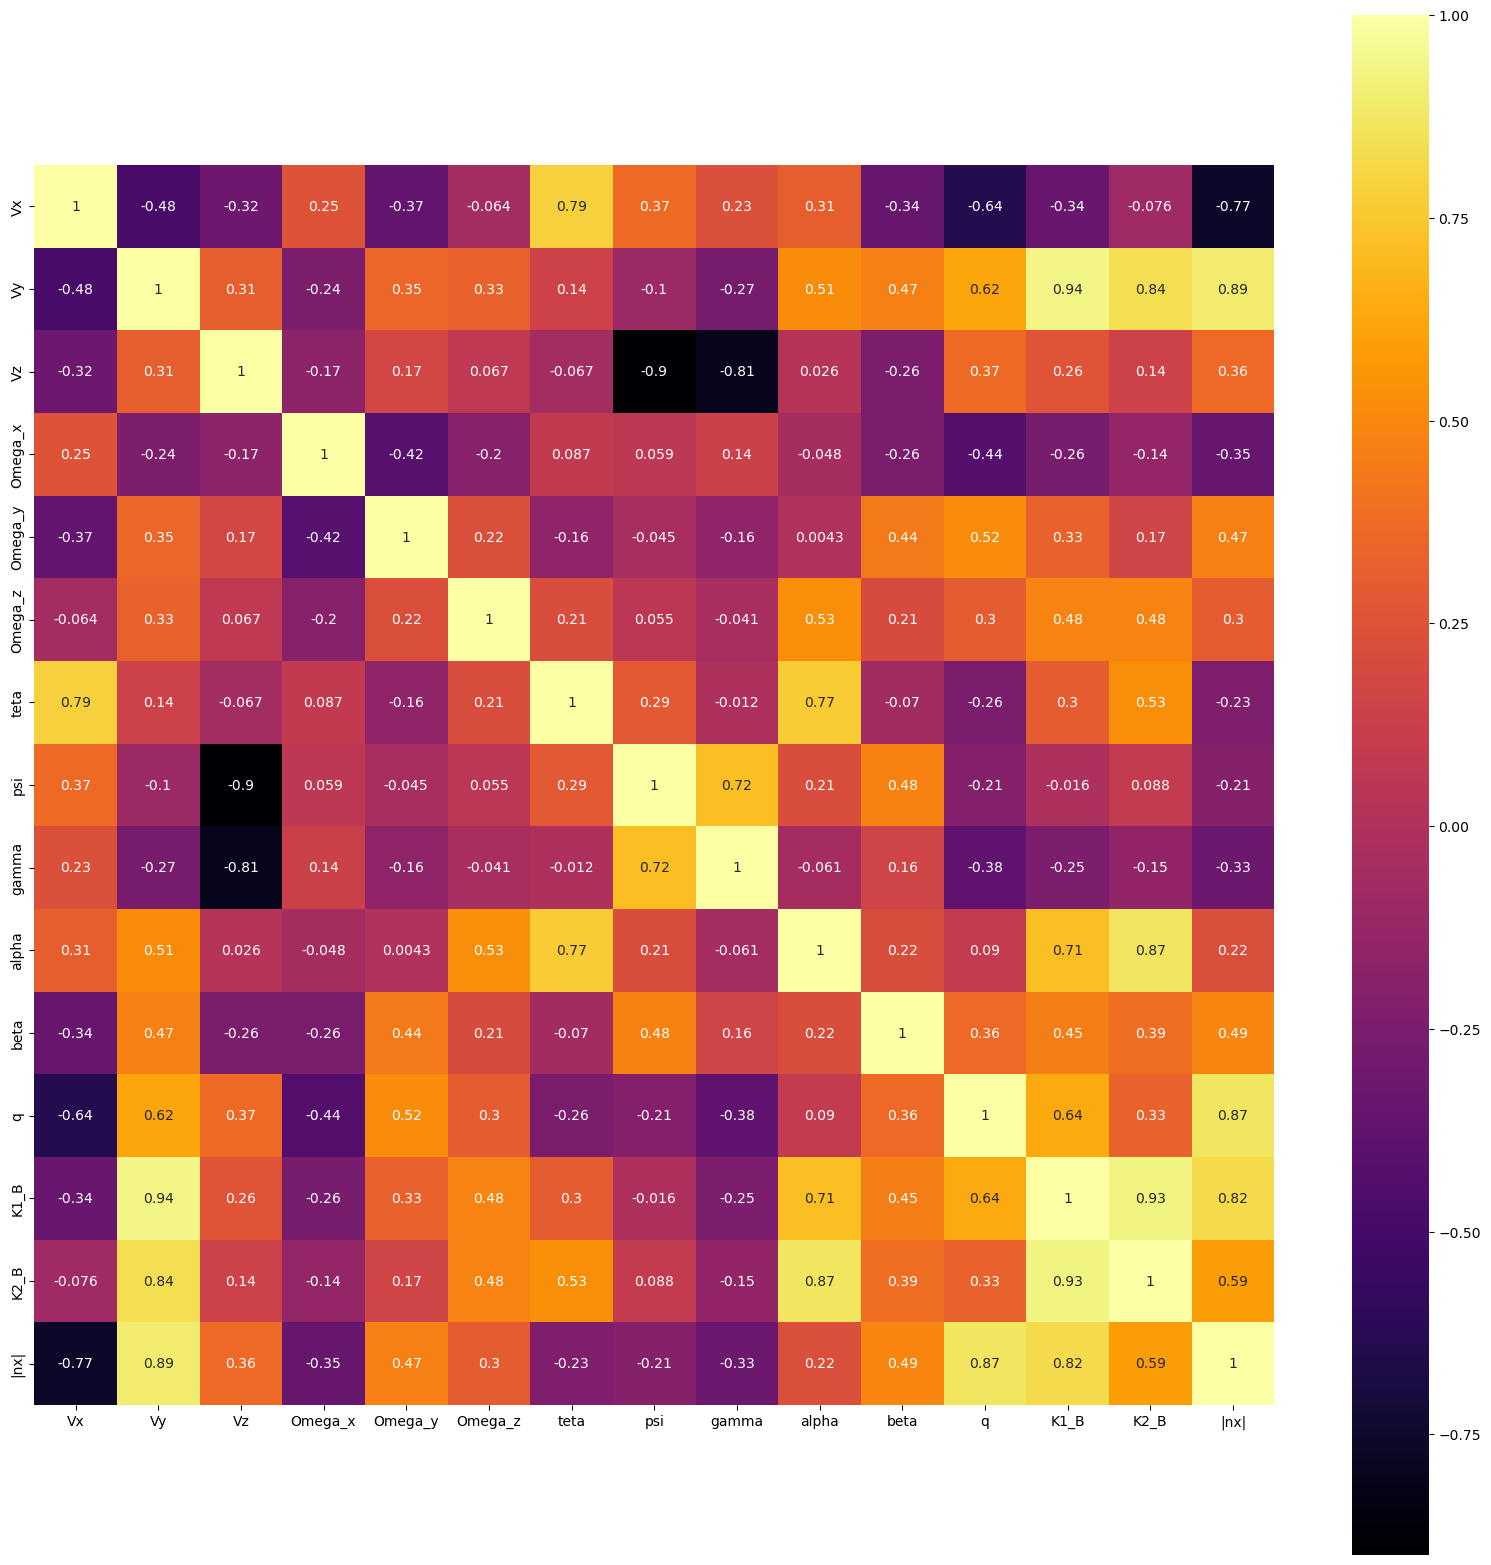

In [11]:
fig = plt.figure(figsize = (20, 20))

ax1 = fig.add_subplot(111)

ax1 = sns.heatmap(data = data_filtered.corr(), 
                  square = True, 
                  cmap = 'inferno', 
                  annot = True)

### Подготовка данных для обучения

In [12]:
data_train, data_test = train_test_split(data_filtered, test_size = 0.25, random_state = random_state)

In [13]:
data_train_features = data_train.drop(['K1_B', 'K2_B'], axis = 1)
data_train_target_1 = data_train['K1_B']
data_train_target_2 = data_train['K2_B']

data_test_features = data_test.drop(['K1_B', 'K2_B'], axis = 1)
data_test_target_1 = data_test['K1_B']
data_test_target_2 = data_test['K2_B']

## Обучение линейной регрессии для коэффициента К1в

### Обучение модели

In [14]:
%%time

model_linear_regression_1 = LinearRegression()
CV_linear_regression = cross_val_score(model_linear_regression_1, 
                                       data_train_features, 
                                       data_train_target_1, 
                                       cv = 5, scoring = 'neg_root_mean_squared_error')

print('rMSE =', -CV_linear_regression.mean())

rMSE = 0.06757879522542394
CPU times: user 151 ms, sys: 54.4 ms, total: 206 ms
Wall time: 51.4 ms


In [15]:
model_linear_regression_1 = LinearRegression()
model_linear_regression_1.fit(data_train_features, data_train_target_1)

LinearRegression()

In [16]:
data_test_predict_1 = model_linear_regression_1.predict(data_test_features)

print('Метрики наилучшей модели из исследованных:')                        
print('\nrMSE = ', round(rMSE(data_test_target_1, data_test_predict_1), 3))

Метрики наилучшей модели из исследованных:

rMSE =  0.068


### Извлечение уравнения линейной регрессии

In [17]:
koefs_1 = pd.DataFrame(zip(data_train_features.columns, model_linear_regression_1.coef_))
koefs_1 = koefs_1.rename({0 : 'Par', 1 : 'Koef'}, axis = 1)
koefs_1 = pd.concat([koefs_1, 
                     pd.DataFrame(
                         data = {'Par': ['Intercept'], 
                                 'Koef': [model_linear_regression_1.intercept_]})]).reset_index(drop = True)

display(koefs_1)

,Par,Koef
0,Vx,0.000114
1,Vy,0.005694
2,Vz,-0.000904
3,Omega_x,0.003321
4,Omega_y,-0.021334
5,Omega_z,0.117438
6,teta,-0.017069
7,psi,-0.002442
8,gamma,-0.001157
9,alpha,0.132342


## Обучение линейной регрессии для коэффициента К2в

### Обучение модели

In [18]:
%%time

model_linear_regression_2 = LinearRegression()
CV_linear_regression = cross_val_score(model_linear_regression_2, 
                                       data_train_features, 
                                       data_train_target_2, 
                                       cv = 5, scoring = 'neg_root_mean_squared_error')

print('rMSE =', -CV_linear_regression.mean())

rMSE = 0.016821471157178386
CPU times: user 104 ms, sys: 42.1 ms, total: 146 ms
Wall time: 36.5 ms


In [19]:
model_linear_regression_2 = LinearRegression()
model_linear_regression_2.fit(data_train_features, data_train_target_2)

LinearRegression()

In [20]:
data_test_predict_2 = model_linear_regression_2.predict(data_test_features)

print('Метрики наилучшей модели из исследованных:')                        
print('\nrMSE = ', round(rMSE(data_test_target_2, data_test_predict_2), 3))

Метрики наилучшей модели из исследованных:

rMSE =  0.017


### Извлечение уравнения линейной регрессии

In [21]:
koefs_2 = pd.DataFrame(zip(data_train_features.columns, model_linear_regression_2.coef_))
koefs_2 = koefs_2.rename({0 : 'Par', 1 : 'Koef'}, axis = 1)
koefs_2 = pd.concat([koefs_2, 
                     pd.DataFrame(
                         data = {'Par': ['Intercept'], 
                                 'Koef': [model_linear_regression_2.intercept_]})]).reset_index(drop = True)

display(koefs_2)

,Par,Koef
0,Vx,-0.001035
1,Vy,0.001480
2,Vz,-0.000290
3,Omega_x,-0.004238
4,Omega_y,-0.023037
5,Omega_z,0.020563
6,teta,0.008012
7,psi,0.000081
8,gamma,0.000085
9,alpha,0.030880


## Сравнение графиков зависемостей коэффициентов системы наведения

### Добавление столбцов со значениями коэффициентов системы наведения, полученными из уравнений линейной регрессии

In [22]:
for df in all_dataframes:
    K1B_appender(df, koefs_1)
    K2B_appender(df, koefs_2)

### Построение графиков

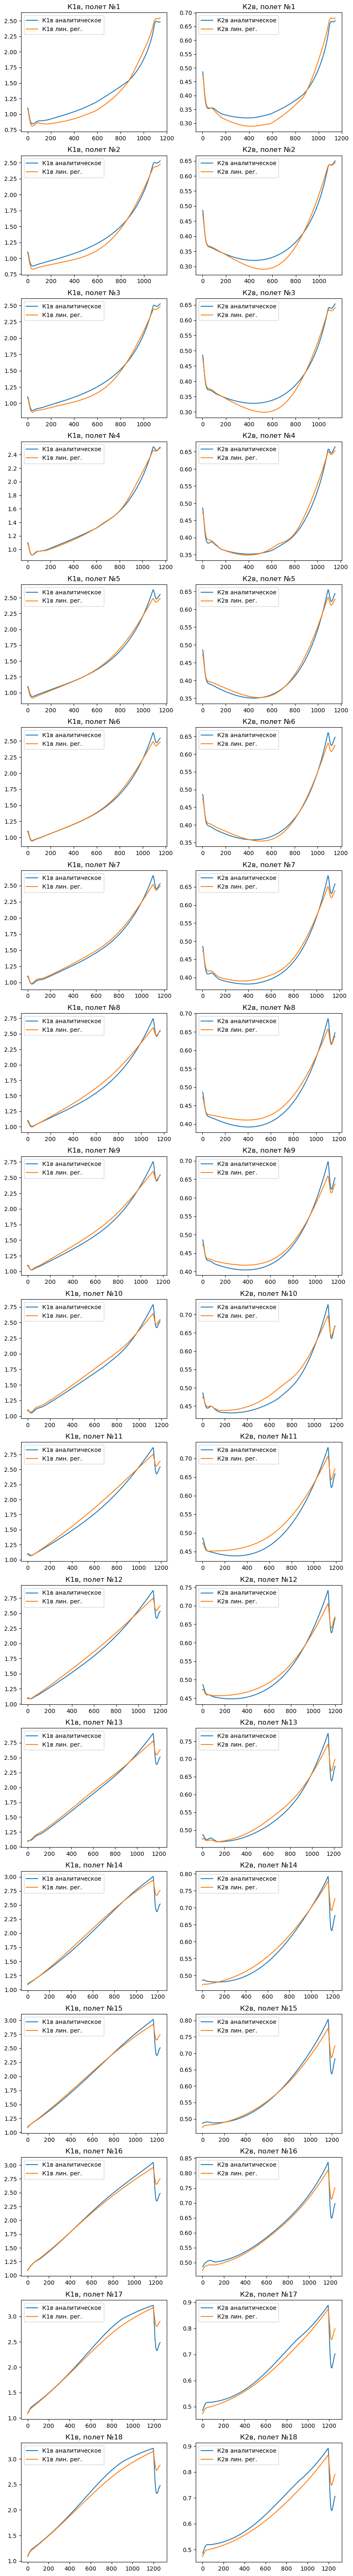

In [23]:
fig = plt.figure(figsize = (10, 80))

ax1 = fig.add_subplot(18, 2, 1)
ax2 = fig.add_subplot(18, 2, 2)

ax3 = fig.add_subplot(18, 2, 3)
ax4 = fig.add_subplot(18, 2, 4)
ax5 = fig.add_subplot(18, 2, 5)
ax6 = fig.add_subplot(18, 2, 6)
ax7 = fig.add_subplot(18, 2, 7)
ax8 = fig.add_subplot(18, 2, 8)

ax9 = fig.add_subplot(18, 2, 9)
ax10 = fig.add_subplot(18, 2, 10)
ax11 = fig.add_subplot(18, 2, 11)
ax12 = fig.add_subplot(18, 2, 12)
ax13 = fig.add_subplot(18, 2, 13)
ax14 = fig.add_subplot(18, 2, 14)

ax15 = fig.add_subplot(18, 2, 15)
ax16 = fig.add_subplot(18, 2, 16)
ax17 = fig.add_subplot(18, 2, 17)
ax18 = fig.add_subplot(18, 2, 18)
ax19 = fig.add_subplot(18, 2, 19)
ax20 = fig.add_subplot(18, 2, 20)

ax21 = fig.add_subplot(18, 2, 21)
ax22 = fig.add_subplot(18, 2, 22)
ax23 = fig.add_subplot(18, 2, 23)
ax24 = fig.add_subplot(18, 2, 24)
ax25 = fig.add_subplot(18, 2, 25)
ax26 = fig.add_subplot(18, 2, 26)

ax27 = fig.add_subplot(18, 2, 27)
ax28 = fig.add_subplot(18, 2, 28)
ax29 = fig.add_subplot(18, 2, 29)
ax30 = fig.add_subplot(18, 2, 30)
ax31 = fig.add_subplot(18, 2, 31)
ax32 = fig.add_subplot(18, 2, 32)

ax33 = fig.add_subplot(18, 2, 33)
ax34 = fig.add_subplot(18, 2, 34)
ax35 = fig.add_subplot(18, 2, 35)
ax36 = fig.add_subplot(18, 2, 36)


# Траектория № 1
ax1.plot(data_x_3500_z_700['K1_B'])
ax1.plot(data_x_3500_z_700['K1_B_new'])
ax1.set_title('К1в, полет №1')
ax1.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax2.plot(data_x_3500_z_700['K2_B'])
ax2.plot(data_x_3500_z_700['K2_B_new'])
ax2.set_title('К2в, полет №1')
ax2.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 2
ax3.plot(data_x_4000_z_0['K1_B'])
ax3.plot(data_x_4000_z_0['K1_B_new'])
ax3.set_title('К1в, полет №2')
ax3.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax4.plot(data_x_4000_z_0['K2_B'])
ax4.plot(data_x_4000_z_0['K2_B_new'])
ax4.set_title('К2в, полет №2')
ax4.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 3
ax5.plot(data_x_4000_z_500['K1_B'])
ax5.plot(data_x_4000_z_500['K1_B_new'])
ax5.set_title('К1в, полет №3')
ax5.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax6.plot(data_x_4000_z_500['K2_B'])
ax6.plot(data_x_4000_z_500['K2_B_new'])
ax6.set_title('К2в, полет №3')
ax6.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 4
ax7.plot(data_x_4000_z_1000['K1_B'])
ax7.plot(data_x_4000_z_1000['K1_B_new'])
ax7.set_title('К1в, полет №4')
ax7.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax8.plot(data_x_4000_z_1000['K2_B'])
ax8.plot(data_x_4000_z_1000['K2_B_new'])
ax8.set_title('К2в, полет №4')
ax8.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 5
ax9.plot(data_x_4500_z_0['K1_B'])
ax9.plot(data_x_4500_z_0['K1_B_new'])
ax9.set_title('К1в, полет №5')
ax9.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax10.plot(data_x_4500_z_0['K2_B'])
ax10.plot(data_x_4500_z_0['K2_B_new'])
ax10.set_title('К2в, полет №5')
ax10.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 6
ax11.plot(data_x_4500_z_500['K1_B'])
ax11.plot(data_x_4500_z_500['K1_B_new'])
ax11.set_title('К1в, полет №6')
ax11.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax12.plot(data_x_4500_z_500['K2_B'])
ax12.plot(data_x_4500_z_500['K2_B_new'])
ax12.set_title('К2в, полет №6')
ax12.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 7
ax13.plot(data_x_4500_z_1000['K1_B'])
ax13.plot(data_x_4500_z_1000['K1_B_new'])
ax13.set_title('К1в, полет №7')
ax13.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax14.plot(data_x_4500_z_1000['K2_B'])
ax14.plot(data_x_4500_z_1000['K2_B_new'])
ax14.set_title('К2в, полет №7')
ax14.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 8
ax15.plot(data_x_5000_z_0['K1_B'])
ax15.plot(data_x_5000_z_0['K1_B_new'])
ax15.set_title('К1в, полет №8')
ax15.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax16.plot(data_x_5000_z_0['K2_B'])
ax16.plot(data_x_5000_z_0['K2_B_new'])
ax16.set_title('К2в, полет №8')
ax16.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 9
ax17.plot(data_x_5000_z_700['K1_B'])
ax17.plot(data_x_5000_z_700['K1_B_new'])
ax17.set_title('К1в, полет №9')
ax17.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax18.plot(data_x_5000_z_700['K2_B'])
ax18.plot(data_x_5000_z_700['K2_B_new'])
ax18.set_title('К2в, полет №9')
ax18.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 10
ax19.plot(data_x_5000_z_1250['K1_B'])
ax19.plot(data_x_5000_z_1250['K1_B_new'])
ax19.set_title('К1в, полет №10')
ax19.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax20.plot(data_x_5000_z_1250['K2_B'])
ax20.plot(data_x_5000_z_1250['K2_B_new'])
ax20.set_title('К2в, полет №10')
ax20.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 11
ax21.plot(data_x_5500_z_0['K1_B'])
ax21.plot(data_x_5500_z_0['K1_B_new'])
ax21.set_title('К1в, полет №11')
ax21.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax22.plot(data_x_5500_z_0['K2_B'])
ax22.plot(data_x_5500_z_0['K2_B_new'])
ax22.set_title('К2в, полет №11')
ax22.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 12
ax23.plot(data_x_5500_z_700['K1_B'])
ax23.plot(data_x_5500_z_700['K1_B_new'])
ax23.set_title('К1в, полет №12')
ax23.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax24.plot(data_x_5500_z_700['K2_B'])
ax24.plot(data_x_5500_z_700['K2_B_new'])
ax24.set_title('К2в, полет №12')
ax24.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 13
ax25.plot(data_x_5500_z_1250['K1_B'])
ax25.plot(data_x_5500_z_1250['K1_B_new'])
ax25.set_title('К1в, полет №13')
ax25.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax26.plot(data_x_5500_z_1250['K2_B'])
ax26.plot(data_x_5500_z_1250['K2_B_new'])
ax26.set_title('К2в, полет №13')
ax26.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 14
ax27.plot(data_x_6000_z_0['K1_B'])
ax27.plot(data_x_6000_z_0['K1_B_new'])
ax27.set_title('К1в, полет №14')
ax27.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax28.plot(data_x_6000_z_0['K2_B'])
ax28.plot(data_x_6000_z_0['K2_B_new'])
ax28.set_title('К2в, полет №14')
ax28.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 15
ax29.plot(data_x_6000_z_700['K1_B'])
ax29.plot(data_x_6000_z_700['K1_B_new'])
ax29.set_title('К1в, полет №15')
ax29.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax30.plot(data_x_6000_z_700['K2_B'])
ax30.plot(data_x_6000_z_700['K2_B_new'])
ax30.set_title('К2в, полет №15')
ax30.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 16
ax31.plot(data_x_6000_z_1250['K1_B'])
ax31.plot(data_x_6000_z_1250['K1_B_new'])
ax31.set_title('К1в, полет №16')
ax31.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax32.plot(data_x_6000_z_1250['K2_B'])
ax32.plot(data_x_6000_z_1250['K2_B_new'])
ax32.set_title('К2в, полет №16')
ax32.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 17
ax33.plot(data_x_6500_z_0['K1_B'])
ax33.plot(data_x_6500_z_0['K1_B_new'])
ax33.set_title('К1в, полет №17')
ax33.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax34.plot(data_x_6500_z_0['K2_B'])
ax34.plot(data_x_6500_z_0['K2_B_new'])
ax34.set_title('К2в, полет №17')
ax34.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

# Траектория № 18
ax35.plot(data_x_6500_z_500['K1_B'])
ax35.plot(data_x_6500_z_500['K1_B_new'])
ax35.set_title('К1в, полет №18')
ax35.legend(labels = ['К1в аналитическое', 'К1в лин. рег.'], loc = 'best')

ax36.plot(data_x_6500_z_500['K2_B'])
ax36.plot(data_x_6500_z_500['K2_B_new'])
ax36.set_title('К2в, полет №18')
ax36.legend(labels = ['К2в аналитическое', 'К2в лин. рег.'], loc = 'best')

## Сравнение зон попадания ОТР с адаптацией системы наведения и без

In [24]:
#Зона попадания ОТР без применения адаптаций в системе наведения
data_zone_adaptive = pd.read_excel('Zone Lin Reg.xlsx', 
                                  header = None, 
                                  sheet_name = 0).rename(columns = {0 : 'X', 1 : 'Y'})

Text(0.5, 1.0, 'Зоны попадания ОТР')

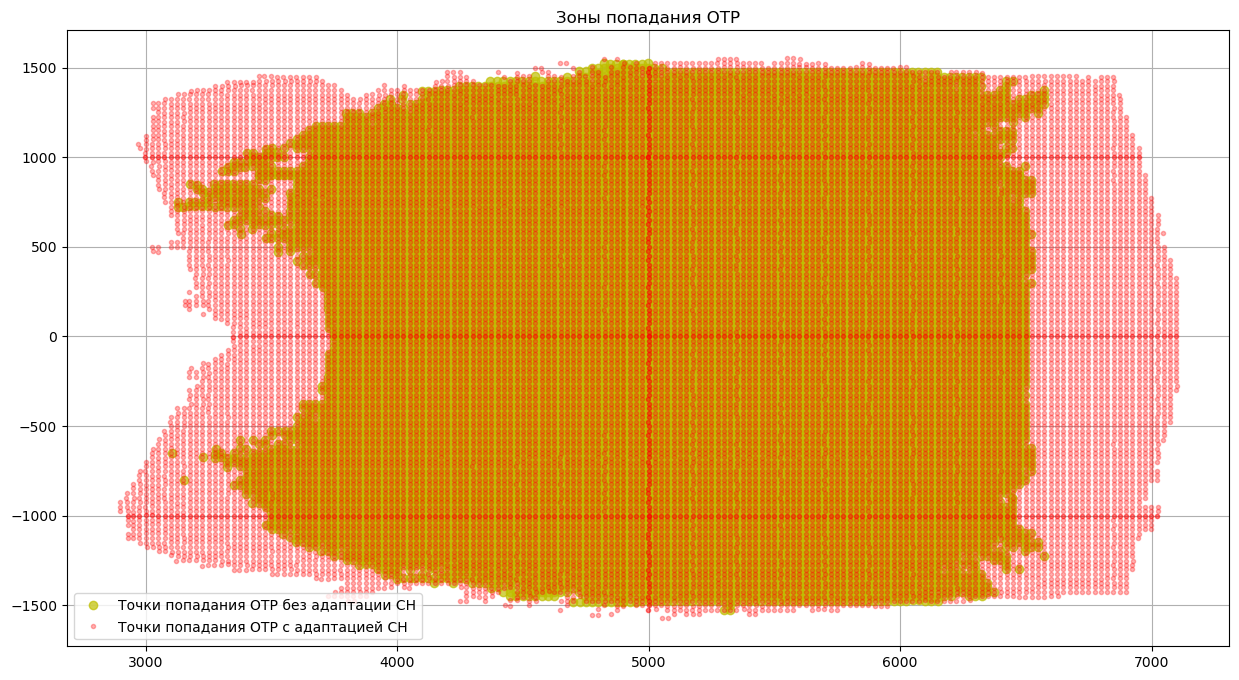

In [25]:
fig = plt.figure(figsize = (15, 8))

ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(data_zone_default['X'], data_zone_default['Y'], 'oy', alpha = 0.7)
ax1.plot(data_zone_adaptive['X'], data_zone_adaptive['Y'], '.r', alpha = 0.3)
ax1.grid(visible = True)
ax1.legend(labels = ['Точки попадания ОТР без адаптации СН', 'Точки попадания ОТР с адаптацией СН'], loc = 'best')
ax1.set_title('Зоны попадания ОТР')

## Основные результаты 

In [26]:
a = data_zone_adaptive.shape[0] / data_zone_default.shape[0]
print(f'Зона с адаптацией больше зоны без адаптации системы наведения примерно в {round(a, 3)} раз.')

Зона с адаптацией больше зоны без адаптации системы наведения примерно в 1.37 раз.


Реальное время выполнения расчетов зоны попадания для обеих версий системы наведения ракеты:

|  |Классическая СН|Адаптивная СН|
|:-|:-:|:-:|
|Время расчета зоны попадания|459.312 сек.|**395.412 сек.**|


# Заключение

В ходе проделанного исследования была разработана система управления ЛА, использующая многопараметрическую адаптацию по целому ряду параметров полета ЛА. Создано СПО, позволяющее промоделировать полет ЛА с применением данной системы управления и построить зону попадания ЛА в цель. Создано СПО, позволяющее обучить модели линейной регрессии с целью получения зависимостей коэффициентов управления. Проведено моделирование 18 траекторий, из параметров которых были получены уравнения линейной регрессии, легшие в основу функциональных зависимостей коэффициентов системы управления ЛА. Проведено построение 2 зон попадания ЛА, одна, иллюстрирующая случай полета ЛА с не адаптивной системой управления и зона попадания для ЛА с системой управления с многопараметрической адаптацией.

Разработанная система управления показывает уменьшение реального времени моделирования зоны попадания ЛА на 13.912% и увеличение площади зоны попадания ЛА примерно на 37%.